# **Analyzing Women and Man Luxury Shoes**


### **Introduction**

 Are you really interested in fashion? Do you like it the luxury brands? Well if so, you are in the perfect article. Because we will be analyzing prices and characteristics of luxury shoes for women an men.

 In this article we will use python and other libraries to analyze the data and we will show a conclusion.

### **Sections**
#### - Introduction
#### - Libraries
#### - Data Retrieval
#### - Data Cleaning
#### - Data Analysis
#### - Data Visualization
#### - Conclusion

### **Libraries**

##### First we will download the libraries that we will use.

In [49]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

### **Data Retrieval**

##### We download the two dataset that we will use from datafinity in the csv format.

In [2]:
women_df=pd.read_csv(os.path.join('data', 'womanshoes.csv'))

C:\Users\lunai\AppData\Local\Temp\ipykernel_11492\2166636644.py:1: DtypeWarning: Columns (25,36,39,44) have mixed types. Specify dtype option on import or set low_memory=False.
  women_df=pd.read_csv(os.path.join('data', 'womanshoes.csv'))


In [3]:
men_df=pd.read_csv(os.path.join('data', 'menshoes.csv'),on_bad_lines="skip")

C:\Users\lunai\AppData\Local\Temp\ipykernel_11492\3198746929.py:1: DtypeWarning: Columns (20,21,25,29,30,36) have mixed types. Specify dtype option on import or set low_memory=False.
  men_df=pd.read_csv(os.path.join('data', 'menshoes.csv'),on_bad_lines="skip")


### **Data Cleaning**

 First of all, we see the size of the two dataset.

In [4]:
men_df.shape #to know the amount of rows and columns  

(19315, 48)

In [5]:
women_df.shape

(19045, 47)

 We want to see how the data looks like.

In [6]:
pd.set_option('display.max_columns', None)#to show all the columns 

In [7]:
women_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19045 entries, 0 to 19044
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   19045 non-null  object 
 1   asins                2208 non-null   object 
 2   brand                18412 non-null  object 
 3   categories           19045 non-null  object 
 4   colors               11889 non-null  object 
 5   count                0 non-null      float64
 6   dateAdded            19045 non-null  object 
 7   dateUpdated          19045 non-null  object 
 8   descriptions         10780 non-null  object 
 9   dimension            2418 non-null   object 
 10  ean                  9816 non-null   float64
 11  features             14108 non-null  object 
 12  flavors              0 non-null      float64
 13  imageURLs            17840 non-null  object 
 14  isbn                 0 non-null      float64
 15  keys                 19045 non-null 

In [8]:
women_df=(women_df #add a column with the name gender and the value F
    .assign(
        gender= "F"
    )
    )

In [9]:
men_df=(men_df #add a column with the name gender and the value M
        .assign(
            gender="M"
        ))

In [10]:
df_all=pd.concat([women_df,men_df]) 

In [11]:
df_all.sample(5)

,id,asins,brand,categories,colors,count,dateAdded,dateUpdated,descriptions,dimension,ean,features,flavors,imageURLs,isbn,keys,manufacturer,manufacturerNumber,merchants,name,prices.amountMin,prices.amountMax,prices.availability,prices.color,prices.condition,prices.count,prices.currency,prices.dateAdded,prices.dateSeen,prices.flavor,prices.isSale,prices.merchant,prices.offer,prices.returnPolicy,prices.shipping,prices.size,prices.source,prices.sourceURLs,prices.warranty,quantities,reviews,sizes,skus,sourceURLs,upc,websiteIDs,weight,gender,vin
13924,AVpe7RNRilAPnD_xRCBs,NaN,Simply Charming,"Women's Clothing,Intimates Accessories,All Wom...",NaN,NaN,2016-01-02T02:57:10Z,2016-03-18T23:45:20Z,NaN,10 in x 10 in x 10 in,NaN,NaN,NaN,http://c.shld.net/rpx/i/s/pi/mp/31094/prod_711...,NaN,"simplycharming/smcbrn,simplycharmingbrnbrownpr...",NaN,SMC-PG-BRN,NaN,Simply Charming Pg-brn Brown Prom Garter,11.1,11.1,NaN,NaN,NaN,NaN,USD,2016-01-02T02:57:10Z,2016-03-17T00:00:00Z,NaN,FALSE,Bidlessnow,NaN,NaN,NaN,NaN,NaN,http://www.sears.com/content/pdp/products/pric...,NaN,NaN,NaN,NaN,"[{""sourceURLs"":[""http://www.sears.com/content/...",http://www.sears.com/content/pdp/config/produc...,NaN,NaN,NaN,F,NaN
12557,AVpe9FIz1cnluZ0-apJE,"B008F063BW,B008F063KS",Nike,"Active,Men,Athletic Socks,Sports & Fitness,Exe...",Blackredwhite,NaN,2015-04-03T18:44:31Z,2016-07-30T03:43:09Z,NaN,NaN,NaN,NaN,NaN,http://ecx.images-amazon.com/images/I/51%2BoxH...,NaN,"drifitcrew3colorl961/b008f063bw,drifitcrew3col...",NaN,SX4689-961,NaN,Dri-fit Crew 3 Color L 961,18.0,18.0,NaN,NaN,NaN,NaN,USD,2016-04-01T18:47:28Z,2016-03-20T00:00:00Z,NaN,false,TK'sBargains,NaN,NaN,FREE Shipping on orders over USD 49.00 FREE Re...,NaN,NaN,http://www.amazon.com/Nike-Ultimatum-Drifit-Xm...,NaN,NaN,"[{""date"":""2015-02-19T00:00:00Z"",""dateAdded"":""2...","Medium,Large,Extra Large",NaN,https://www.amazon.com/Nike-SX4689-961-Dri-fit...,NaN,NaN,1 pounds,M,NaN
1611,AVpfAf87LJeJML430VVU,NaN,Generic / Unbranded,"Clothing, Shoes, Accessories,Men's Sunglasses",NaN,NaN,2016-02-14T11:23:19Z,2016-02-14T11:23:19Z,NaN,NaN,6.095943e+11,"[{""key"":""EAN"",""value"":[""Does Not Apply""]},{""ke...",NaN,http://i.ebayimg.com/00/s/NjAwWDYwMA==/z/kPsAA...,NaN,"0609594316797,609594316797,frogmirrormenwomens...",NaN,NaN,"[{""dateSeen"":[""2016-02-12T00:00:00Z""],""name"":""...",Frog Mirror Men Women's Classical Sunglasses C...,11.41,11.41,NaN,NaN,New with tags,NaN,AUD,2016-02-14T11:23:19Z,2016-02-12T00:00:00Z,NaN,false,NaN,NaN,NaN,FREE,NaN,NaN,http://www.ebay.com.au/itm/Frog-Mirror-Men-Wom...,NaN,NaN,NaN,NaN,"[{""sourceURLs"":[""http://www.ebay.com.au/itm/Fr...",http://www.ebay.com.au/itm/Frog-Mirror-Men-Wom...,609594316797.0,NaN,NaN,M,NaN
4397,AVpfKQM0ilAPnD_xWOtP,NaN,Azzuro,"Men's Sport Coats & Blazers,All Men's Clothing...",NaN,NaN,2016-01-02T03:45:16Z,2016-04-06T03:05:57Z,NaN,10.5 in x 11.25 in x 1.2 in,NaN,"[{""key"":""Style"",""value"":[""Sport coats & blazer...",NaN,http://c.shld.net/rpx/i/s/pi/mp/29267/prod_473...,NaN,azzuromannewfashiontwopatchpocketsfrontblackle...,NaN,a13090600ux1189,NaN,Azzuro Man New Fashion Two Patch Pockets Front...,42.99,42.99,NaN,NaN,NaN,NaN,USD,2016-01-02T03:45:16Z,2016-03-31T00:00:00Z,NaN,false,Unique Bargains,NaN,NaN,NaN,NaN,NaN,http://www.sears.com/content/pdp/products/pric...,NaN,NaN,NaN,NaN,"[{""sourceURLs"":[""http://www.sears.com/content/...",http://www.sears.com/content/pdp/products/pric...,NaN,NaN,NaN,M,NaN
463,AVpfDlggLJeJML431aAm,"B005CMG9DI,B005962JCW,B009LORWZC",Nike,"Shoes,Clothing, Shoes & Jewelry,Men,Athletic,F...",BlackBlackHyper Jade,NaN,2016-03-27T12:10:12Z,2016-07-17T08:42:16Z,NaN,NaN,NaN,NaN,NaN,http://ecx.images-amazon.com/images/I/416Ol5yn...,NaN,"nike/442171002,nikemensairgriffermaxiitraining...",NaN,442171-002,NaN,Nike Men's Air Griffer Max Ii Training Shoe,114.99,175.00,NaN,NaN,NaN,NaN,USD,2016-03-27T12:10:12Z,2015-04-20T13:50:22.883Z,NaN,false,NaN,NaN,NaN,NaN,NaN,NaN,http://www.amazon.com/Nike-Mens-Griffey-Basket...,NaN,NaN,"[{""date"":""2015-03-01T06:00:

In [12]:
df_all.info() #show the columns to select with 

<class 'pandas.core.frame.DataFrame'>
Index: 38360 entries, 0 to 19314
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38360 non-null  object 
 1   asins                4779 non-null   object 
 2   brand                37469 non-null  object 
 3   categories           38360 non-null  object 
 4   colors               22902 non-null  object 
 5   count                0 non-null      float64
 6   dateAdded            38360 non-null  object 
 7   dateUpdated          38360 non-null  object 
 8   descriptions         20621 non-null  object 
 9   dimension            5409 non-null   object 
 10  ean                  19779 non-null  float64
 11  features             28033 non-null  object 
 12  flavors              0 non-null      float64
 13  imageURLs            36111 non-null  object 
 14  isbn                 0 non-null      float64
 15  keys                 38360 non-null  obje

In [13]:
#Select the columns that we need
df_all= (df_all
         .filter(['brand', 'categories', 'colors','manufacturer','merchants', 'name', 'prices.amountMin','prices.amountMax','prices.condition','prices.currency', 'prices.dateAdded','prices.isSale','prices.merchant','gender'])
)
df_all

,brand,categories,colors,manufacturer,merchants,name,prices.amountMin,prices.amountMax,prices.condition,prices.currency,prices.dateAdded,prices.isSale,prices.merchant,gender
0,Zoot,"Shoes,Clothing,Women's Shoes,All Women's Shoes","Blue,Multicolor",Zoot,"[{""dateSeen"":[""2016-11-11T09:49:00Z""],""name"":""...",Zoot Tt Trainer 2.0 Round Toe Synthetic Sne...,71.99,71.99,NaN,USD,2016-11-11T09:49:00Z,TRUE,NaN,F
1,Zoot,"Shoes,Clothing,Women's Shoes,All Women's Shoes","Blue,Multicolor",Zoot,"[{""dateSeen"":[""2016-11-11T09:49:00Z""],""name"":""...",Zoot Tt Trainer 2.0 Round Toe Synthetic Sne...,250,250,new,USD,2016-11-11T09:49:00Z,FALSE,ApparelSave - Walmart.com,F
2,Zoot,"Shoes,Clothing,Women's Shoes,All Women's Shoes","Blue,Multicolor",Zoot,"[{""dateSeen"":[""2016-11-11T09:49:00Z""],""name"":""...",Zoot Tt Trainer 2.0 Round Toe Synthetic Sne...,75.99,75.99,new,USD,2016-11-11T09:49:00Z,TRUE,ApparelSave - Walmart.com,F
3,Zoot,"Shoes,Clothing,Women's Shoes,All Women's Shoes","Blue,Multicolor",Zoot,"[{""dateSeen"":[""2016-11-11T09:49:00Z""],""name"":""...",Zoot Tt Trainer 2.0 Round Toe Synthetic Sne...,79.98,79.98,new,USD,2016-11-11T09:49:00Z,TRUE,ApparelSave - Walmart.com,F
4,Wild Pair,"Shoes,Women's Shoes,Clothing,All Women's Shoes",Brown,Wild Pair,"[{""dateSeen"":[""2016-11-16T12:56:36Z""],""name"":""...",Wild Pair Colfax Women Peep-toe Synthetic Bro...,26.98,26.98,NaN,USD,2016-11-16T12:56:36Z,TRUE,NaN,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19310,"Xray, XRay","Clothing, Shoes & Accessories,Men's Shoes,Boots",Black,NaN,"[{""dateSeen"":[""2016-02-27T00:00:00Z""],""name"":""...",New Xray Hester Men's Lace Up Boots - Black - ...,29.95,29.95,New with box,USD,2016-03-04T05:54:20Z,False,NaN,M
19311,Fila,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,unknown,"[{""dateSeen"":[""2016-10-05T22:23:17Z""],""name"":""...",Fila Men's Original Tennis Navy/white/gold Fas...,64.95,64.95,new,USD,2016-10-05T22:23:17Z,False,ULTIMATE SHOE ZONE - Walmart.com,M
19312,Seek Optics,"Women's Sunglasses,Sunglasses,Bags & Accessori...",NaN,NaN,NaN,Seek Optics New Seek Polarized Replacement Len...,32.48,32.48,NaN,USD,2016-01-02T02:39:11Z,True,"Seek Optics, Inc",M
19313,Seek Optics,"Women's Sunglasses,Sunglasses,Bags & Accessori...",NaN,NaN,NaN,Seek Optics New Seek Polarized Replacement Len...,31.48,31.48,NaN,USD,2016-01-02T02:39:11Z,True,"Seek Optics, Inc",M


In [14]:
df_all["prices.isSale"].value_counts()#to know the diferent values of the column prices.isSale

prices.isSale
FALSE                                                                                                                            12679
false                                                                                                                            11518
TRUE                                                                                                                              6355
true                                                                                                                              4845
False                                                                                                                             2128
True                                                                                                                               803
http://www.amazon.com/Jewelplus-Yellow-Solid-Chain-Necklace/dp/B00EXJ0W2U                                                            4
USD                                      

In [15]:
df_all["prices.condition"].value_counts()

prices.condition
new                 17624
New with tags        2947
New                  1797
New with box         1306
New without box       442
Pre-owned             329
New without tags      249
New with defects      127
Brand New              11
Used                    4
Amazon.com              2
47.67                   1
57.2                    1
Name: count, dtype: int64

 1. After that we will start cleaning the data. We will do it in the next steps:
 2. First, we change the structure of the columns in order to will be more easy to indentify and write them when we do the cleaning. 
 3. In the second step, we drop all the nulls in the merchants column because we want to work with the data that we have. 
 4. Then we make an auxiliar funcition to can work only with the values True and False and we make the values in a specifict format in the column priceissale. 
 5. We need to make an other auxiliar function in the column condition because we have a lot of differents values and we want to group them in a specify category. 
 6. In the next step we want to change the format of the values to can work with them after.
 7. We delete de columns that we don't need to work with them in this case merchant.
 8. After that we name a rename to modify the name of the columns to can see the data more clear and nice. 
 9. The last thing that we do is a filter to put the columns in a specific order.

In [16]:
def True_False (value):
    try:
        value=value.capitalize()
    except: 
        return None
    return value if value in ["True","False"] else None 
 

In [17]:
def condition (value):
    if value in ["new","Brand New"]:
        return "New"
    elif value in ["Pre-owned","New without tags"]:
        return "Used"
    elif value in ["Amazon.com","47.67","57.2"]:
        return None 
    else: 
        return value

In [18]:
df_clean = (df_all
            .rename(columns=lambda col: col.lower().replace(".", "_"))
            .dropna(subset=['merchants'])
            .assign(
                prices_issale=lambda df: df.prices_issale.apply(True_False),
                prices_condition=lambda df: df.prices_condition.apply(condition),
                merchants=lambda df: df.merchants.apply(lambda x: eval(x)[0]),
                merchants_name=lambda df: df.merchants.apply(lambda x: x['name']),
                amountmin=lambda df: pd.to_numeric(df.prices_amountmin, errors='coerce'),
                amountmax=lambda df: pd.to_numeric(df.prices_amountmax, errors='coerce'),
                issale=lambda df: df.prices_issale.astype(bool),
                dateadded=lambda df: pd.to_datetime(df.prices_dateadded, errors='coerce')
            
            )
            .drop(columns=['merchants'])
            .rename(columns={'prices_condition':'condition','prices_currency':'currency'})
            .filter(['name','gender','brand','colors','categories','manufacturer', 'amountmin', 'amountmax', 'condition','currency', 'dateadded', 'issale','merchants_name',])
            
)        


In [19]:
df_clean.info()#check the columns and the type of data

<class 'pandas.core.frame.DataFrame'>
Index: 27656 entries, 0 to 19311
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   name            27656 non-null  object             
 1   gender          27656 non-null  object             
 2   brand           26765 non-null  object             
 3   colors          19993 non-null  object             
 4   categories      27656 non-null  object             
 5   manufacturer    15304 non-null  object             
 6   amountmin       27632 non-null  float64            
 7   amountmax       27637 non-null  float64            
 8   condition       24829 non-null  object             
 9   currency        27644 non-null  object             
 10  dateadded       27632 non-null  datetime64[ns, UTC]
 11  issale          27656 non-null  bool               
 12  merchants_name  27656 non-null  object             
dtypes: bool(1), datetime64[ns, UTC](1), 

In [20]:
df_clean.head(5) #show the columns ordered

,name,gender,brand,colors,categories,manufacturer,amountmin,amountmax,condition,currency,dateadded,issale,merchants_name
0,Zoot Tt Trainer 2.0 Round Toe Synthetic Sne...,F,Zoot,"Blue,Multicolor","Shoes,Clothing,Women's Shoes,All Women's Shoes",Zoot,71.99,71.99,NaN,USD,2016-11-11 09:49:00+00:00,True,Apparelsave
1,Zoot Tt Trainer 2.0 Round Toe Synthetic Sne...,F,Zoot,"Blue,Multicolor","Shoes,Clothing,Women's Shoes,All Women's Shoes",Zoot,250.00,250.00,New,USD,2016-11-11 09:49:00+00:00,True,Apparelsave
2,Zoot Tt Trainer 2.0 Round Toe Synthetic Sne...,F,Zoot,"Blue,Multicolor","Shoes,Clothing,Women's Shoes,All Women's Shoes",Zoot,75.99,75.99,New,USD,2016-11-11 09:49:00+00:00,True,Apparelsave
3,Zoot Tt Trainer 2.0 Round Toe Synthetic Sne...,F,Zoot,"Blue,Multicolor","Shoes,Clothing,Women's Shoes,All Women's Shoes",Zoot,79.98,79.98,New,USD,2016-11-11 09:49:00+00:00,True,Apparelsave
4,Wild Pair Colfax Women Peep-toe Synthetic Bro...,F,Wild Pair,Brown,"Shoes,Women's Shoes,Clothing,All Women's Shoes",Wild Pair,26.98,26.98,NaN,USD,2016-11-16 12:56:36+00:00,True,Apparelsave


### **Data Analysis**

In [21]:
df_clean.describe()#show the statistics of the data

,amountmin,amountmax
count,27632.000000,27637.000000
mean,98.476891,100.128542
std,251.849388,257.021626
min,0.000000,0.000000
25%,29.990000,29.990000
50%,55.000000,55.000000
75%,97.962500,98.130000
max,31950.000000,31950.000000


In [22]:
df_clean["condition"].value_counts(normalize=True) #show the percentage of the values of the column condition

condition
New                 0.782351
New with tags       0.118692
New with box        0.052600
Used                0.023440
New without box     0.017802
New with defects    0.005115
Name: proportion, dtype: float64

In [23]:
df_clean["currency"].value_counts()#show the values of the column currency

currency
USD                                                   26111
CAD                                                     941
AUD                                                     456
EUR                                                      87
GBP                                                      37
UnbeatableSale.com, Inc. - Walmart.com                    3
PalmBeach Jewelry - Walmart.com                           3
Wholesale Costume and Party Supplies - Walmart.com        2
Off Price Direct - Walmart.com                            1
new                                                       1
SHOEBACCA LTD. - Walmart.com                              1
Shoes.com                                                 1
Name: count, dtype: int64

In [24]:
df_clean["issale"].value_counts(normalize=True)#show the percentage of the values of the column issale

issale
True     0.921608
False    0.078392
Name: proportion, dtype: float64

In [25]:
df_clean['brand'].value_counts(normalize=True)#show the percentage of the values of the column brand

brand
Nike                  0.065944
Ralph Lauren          0.046329
PUMA                  0.023127
VANS                  0.021409
New Balance           0.018831
                        ...   
Adtec                 0.000037
Rubie's Costume Co    0.000037
LEVI STRAUSS & CO.    0.000037
BOSS                  0.000037
Xray, XRay            0.000037
Name: proportion, Length: 2423, dtype: float64

In [26]:
df_clean['manufacturer'].value_counts(normalize=True)# show the percentage of the values of the column manufacturer 

manufacturer
Puma                       0.033847
Nike                       0.033717
Qianyuyu                   0.025745
New Balance                0.024242
VANS                       0.019472
                             ...   
Firefly                    0.000065
Fabrication Enterprises    0.000065
HUF Men's Footwear         0.000065
SOLE Footwear              0.000065
5150                       0.000065
Name: proportion, Length: 1317, dtype: float64

In [27]:
df_clean["gender"].value_counts(normalize=True) #show the percentage of the values of the column gender

gender
M    0.505062
F    0.494938
Name: proportion, dtype: float64

In [28]:
df_clean["categories"].value_counts(normalize=True) #show the percentage of the values of the column categories

categories
All Men's Shoes,Shoes,Men's Shoes,Clothing                                                                                         0.133280
Shoes,Women's Shoes,Clothing,All Women's Shoes                                                                                     0.103992
Clothing,Shoes,Women's Shoes,All Women's Shoes                                                                                     0.083635
Shoes,Clothing,Women's Shoes,All Women's Shoes                                                                                     0.074197
Clothing,Shoes,Men's Shoes,All Men's Shoes                                                                                         0.059155
                                                                                                                                     ...   
Clothing, Shoes & Accessories,Men's Shoes,Boots,Occupational                                                                       0.000036
Clothing,

In [29]:
df_clean["merchants_name"].value_counts(normalize=True) #show the percentage of the values of the column merchants_name

merchants_name
Apparelsave                    0.259003
Www.ralphlauren.com            0.043173
Walmart.com                    0.030879
Virtual Exchanges Inc          0.026830
Shoenerds                      0.025130
                                 ...   
Grob5066grob5066 - Ebay.com    0.000036
Oskamp26 - Ebay.com            0.000036
Masstextile - Ebay.com         0.000036
Simonjessie2008 - Ebay.com     0.000036
13brutus - Ebay.com            0.000036
Name: proportion, Length: 2118, dtype: float64

<Axes: xlabel='gender', ylabel='amountmin'>

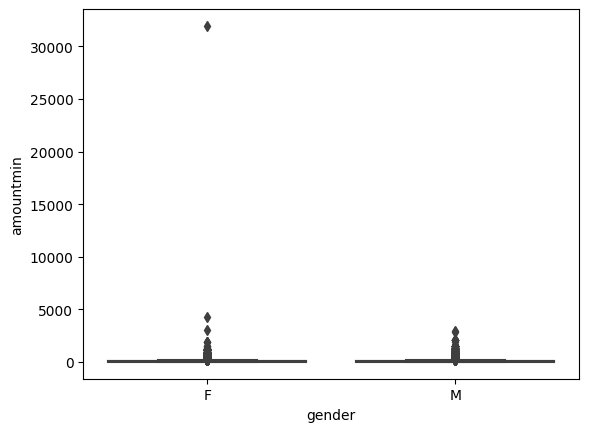

In [30]:
sns.boxplot(df_clean,x="gender",y="amountmin") 

<Axes: xlabel='gender', ylabel='amountmax'>

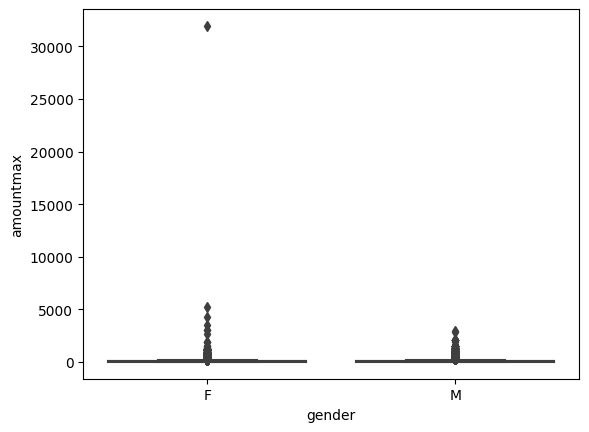

In [31]:
sns.boxplot(df_clean,x="gender",y="amountmax")

In [32]:
df_clean = (df_clean[
    (np.abs(df_clean.amountmin - df_clean.amountmin.mean()) <= 3 * df_clean.amountmin.std())])


In [33]:
df_clean = (df_clean[
    (np.abs(df_clean.amountmax - df_clean.amountmin.mean()) <= 3 * df_clean.amountmin.std())
])

<Axes: xlabel='gender', ylabel='amountmin'>

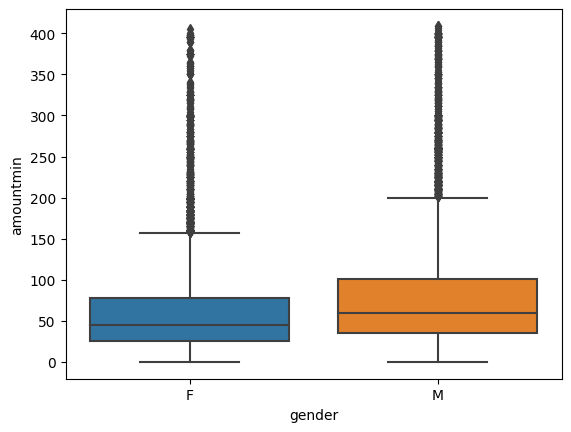

In [34]:
sns.boxplot(df_clean,x="gender",y="amountmin")

<Axes: xlabel='gender', ylabel='amountmax'>

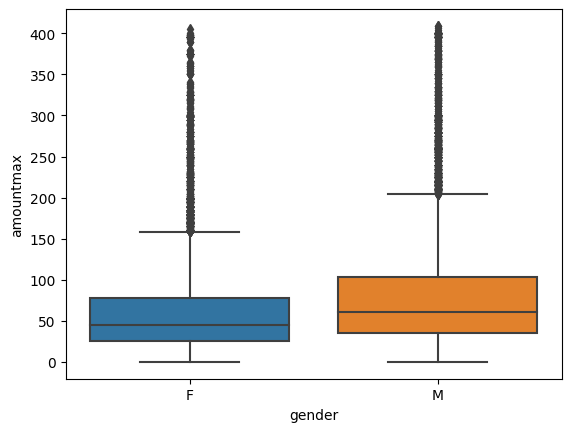

In [35]:
sns.boxplot(df_clean,x="gender",y="amountmax")

### **Data Visualization**

 Some of the question that we want to reply with our analysis are:

 1. What is the distribution of the shoes per gender?
 2. What are the relationship between the prices of the shoes?
 3. What are the brand with more shoes?
 4. What are the most cheap shoes per brand?
 5. What are the most expensive shoes per brand?
 6. What are the colors most use of the shoes?
 7. Which is the distribution of the shoes per year?
 8. What are the prices of the shoes according to the condition and gender?


### What is the distribution of the shoes per gender?

c:\Users\lunai\OneDrive\Escritorio\LUNA DATA\PROYECTOS\luxury_shoes_analysis\env\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


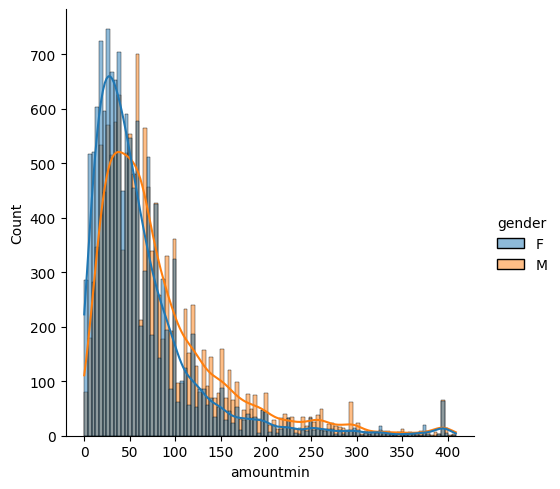

In [36]:
sns.displot(df_clean,x="amountmin",kde=True,hue="gender");


c:\Users\lunai\OneDrive\Escritorio\LUNA DATA\PROYECTOS\luxury_shoes_analysis\env\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


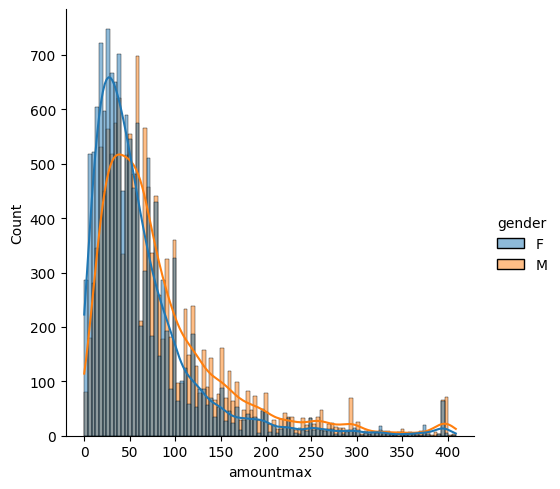

In [37]:
sns.displot(df_clean,x="amountmax",kde=True,hue="gender");


In the case of the distribution of shoes per gender we can see that we have more shoes of man that women in the dataset.  

### What is the relationship between the price of the shoes?

<Axes: xlabel='amountmin', ylabel='amountmax'>

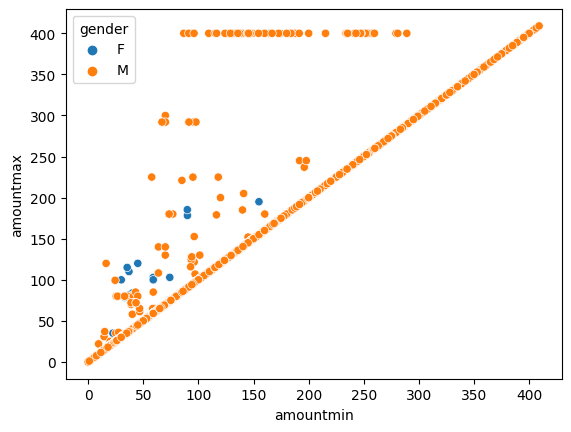

In [38]:
sns.scatterplot(df_clean,x="amountmin",y="amountmax",hue="gender")

We can see that exits a correlation between the amountmin and amountmax of the shoes. The amountmax is conditionate by the amountmin. In this dataset some times the amountmin is the same that the amountmax. The amountmax is no really defined.

### What are the brand with more shoes?


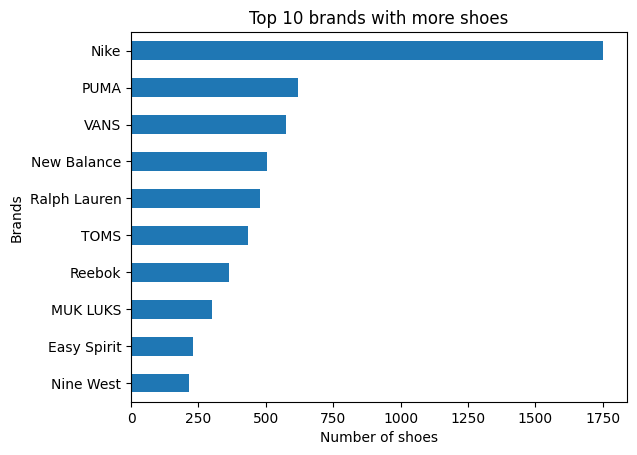

In [39]:
(df_clean
 .brand
 .value_counts()
 .head(10)
 .sort_values(ascending=True)
 .plot(
        kind='barh', 
        title='Top 10 brands with more shoes',
        xlabel='Number of shoes',
        ylabel='Brands'
     )
)

plt.show()

We can se that the brand with more shoes is Nike follow by Puma, Vans and New Balance.



### What are the most expesive shoes per brand?



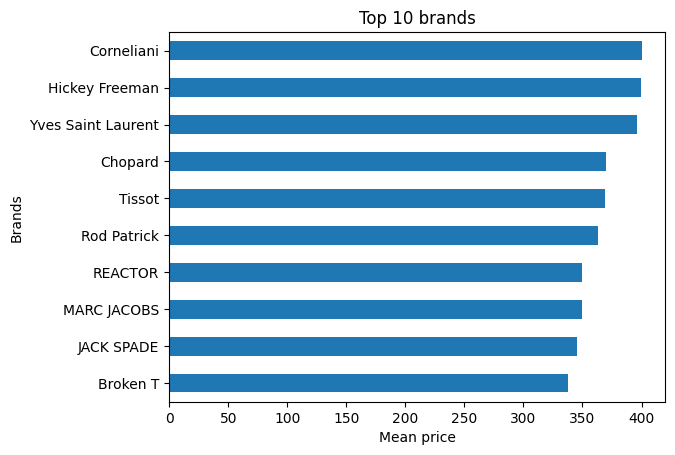

In [40]:
(df_clean
 .groupby('brand')
 .amountmin
 .mean()
 .sort_values(ascending=False)
 .head(10)
 .sort_values(ascending=True)
 .plot(
        kind='barh', 
        title='Top 10 brands',
        xlabel='Mean price',
        ylabel='Brands'
     )
)

plt.show()


 ### What are the most cheap shoes per brand?

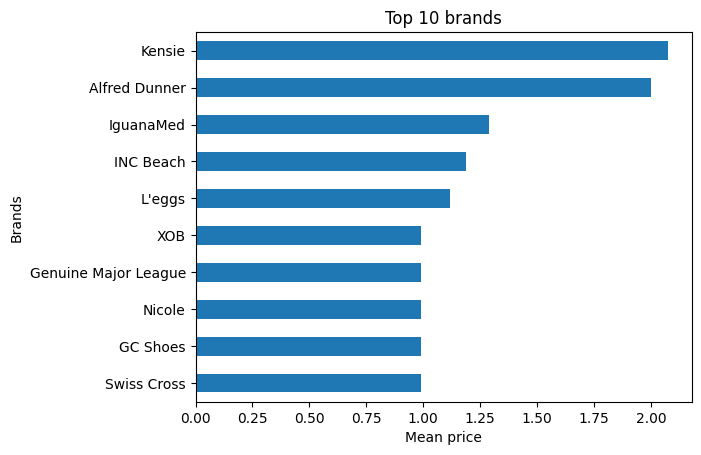

In [41]:
(df_clean
 .groupby('brand')
 .amountmin
 .mean()
 .sort_values(ascending=True)
 .head(10)
 .sort_values(ascending=True)
 .plot(
        kind='barh', 
        title='Top 10 brands',
        xlabel='Mean price',
        ylabel='Brands'
     )
)

plt.show()

In this case we can see that the shoes more expesive are the shoes of the brand Corneliani with a mean price of 400 usd , follow by Hickey Freeman and Yves Sant Laurent and the shoes more cheap are the shoes of the brand Swiss Cross with a mean of 1 usd.


 ### What are the colors most use of the shoes?


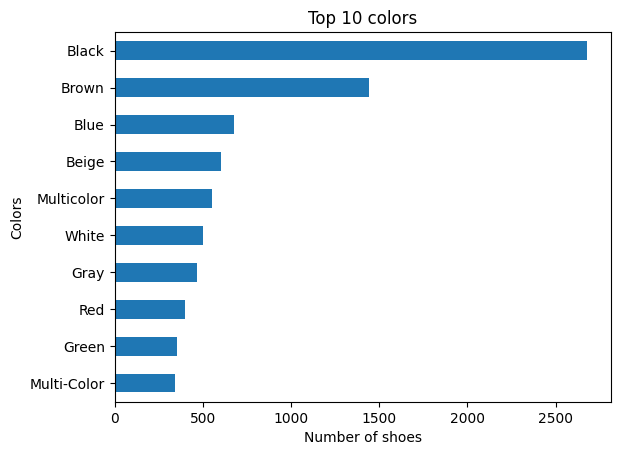

In [42]:
(df_clean
 .colors
 .value_counts()
 .head(10)
 .sort_values(ascending=True)
 .plot(
        kind='barh', 
        title='Top 10 colors',
        xlabel='Number of shoes',
        ylabel='Colors'
     )
)

plt.show()

In this case we can see that the color most use of the shoes are the black color.


### Which is the distribution of the shoes per year?
 


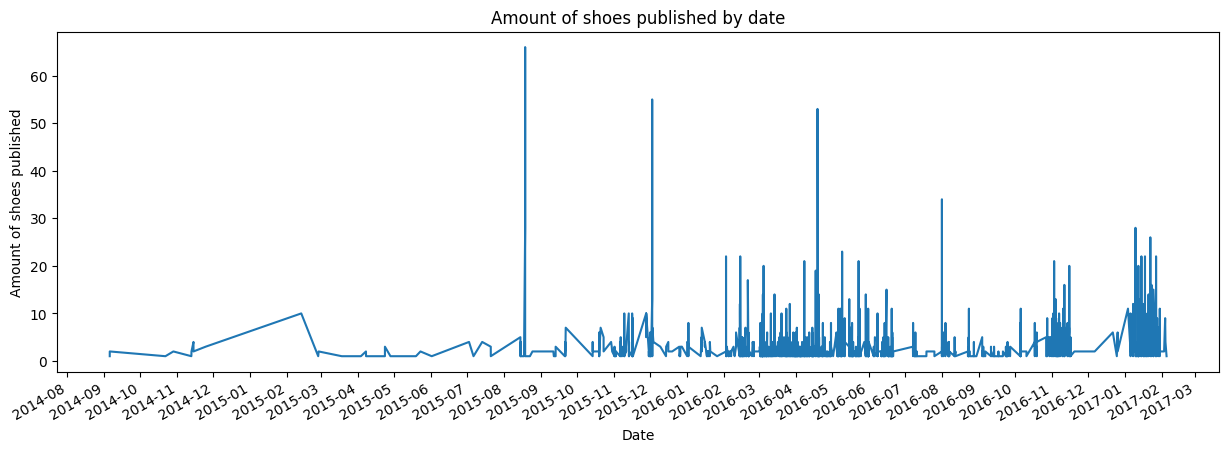

In [51]:
ax=(df_clean
 .groupby("dateadded")
 .count()
 .name
    .plot(
        kind='line',
        title='Amount of shoes published by date',    
        xlabel='Date',
        ylabel='Amount of shoes published',
        figsize=(15, 5),
        )
)


# Customize the x-axis date format and frequency for monthly ticks
date_format = mdates.DateFormatter('%Y-%m')  # Customize the date format as needed
ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Set ticks for each month
plt.show()

We can se that the distribution of the shoes per year is more elevate in the year 2015 between the month agust and september.


 ### What are the prices of the shoes according to the condition and gender?


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'New'),
  Text(1, 0, 'New with box'),
  Text(2, 0, 'New with tags'),
  Text(3, 0, 'New with defects'),
  Text(4, 0, 'New without box'),
  Text(5, 0, 'Used')])

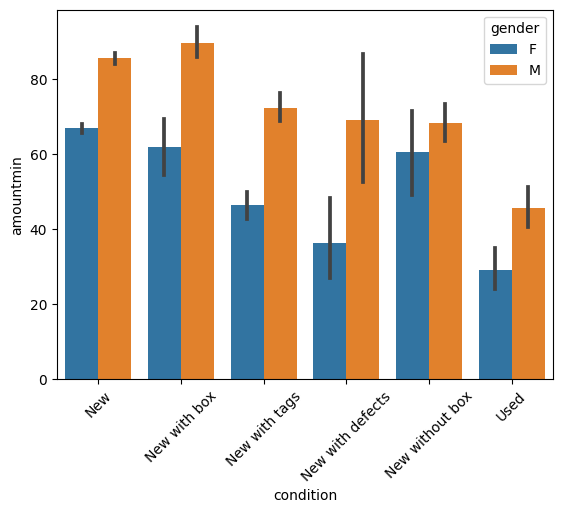

In [ ]:
sns.barplot(df_clean,x="condition",y="amountmin",hue="gender",order=["New","New with box","New with tags","New with defects","New without box","Used"])
plt.xticks(rotation=45)

In this graph we can see the prices of the shoes and we can determinate that the new are more expensive than the rest of the condition. In general the man shoes are more expensive that women shoes. In order to the condition is decreasing the price of the shoes too and this have a lot of sense because the new shoes are more expensive than the used shoes. 

### **Conclusion**

In this article we did a analysis about luxury shoes of women and man. The dataset is between the year 2014 until 2017. We can see that the prices of the man shoes are more expensive than women shoes and the brand with more shoes are Nike. Also the brand with more expensive shoes is Corneliani and the brand with the most cheapear are Kensie.We can see that the color most use of the shoes are the black color and the year with more shoes published was the 2015 between the month of August and September. About the condition of the shoes in order to this one is  decreasing the price of the shoes too and this have a lot of sense because the new shoes are always more expensive than the used shoes.
If we have beter data we can do a better analysis and we can see more interesting things about the luxury shoes.